In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("../data/Titanic.csv")

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [27]:
df.drop(["PassengerId", "Name"], axis=1, inplace=True).corr()

AttributeError: 'NoneType' object has no attribute 'corr'

<Axes: xlabel='Age', ylabel='Fare'>

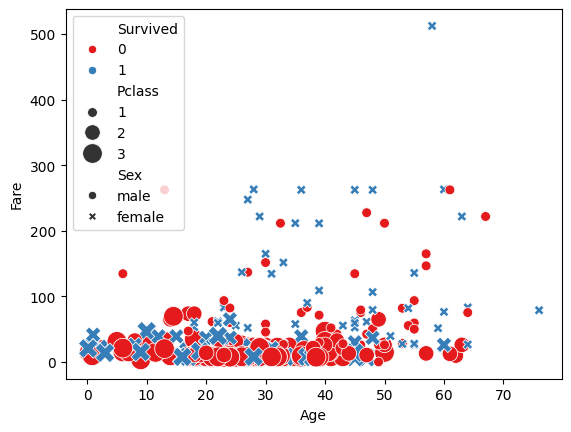

In [32]:
sns.scatterplot(x="Age", y="Fare", data=df,hue="Survived",size="Pclass",style="Sex",palette="Set1",sizes=(50,200))


In [ ]:

def split_dataset(df):
    unique_value = mid.slider("Enter the number of unique values for threshold", 1, 20, 5)
    continous_columns = []
    categorical_columns = []
    discrete_columns = []

    for col in df.columns:
        if df[col].dtype == 'object' and df[col].nunique() > unique_value:
            discrete_columns.append(col)
            
        elif df[col].nunique() <= unique_value:
            categorical_columns.append(col)
            
        else:
            continous_columns.append(col)
            

    col1, col2, col3 = mid.columns(3)

    col1.write("Continuous Columns:")
    col1.write(continous_columns)


    col2.write("Categorical Columns:")
    col2.write(categorical_columns)


    col3.write("Discrete Columns:")
    col3.write(discrete_columns)
    
    return continous_columns, categorical_columns, discrete_columns
def Scatter_plot(df,continous_columns, categorical_columns, discrete_columns):
    mid.header("Select Plot Options")
    x_column = mid.selectbox("X-axis", [None] + list(categorical_columns)+ list(continous_columns))
    y_column = mid.selectbox("Y-axis", [None] + list(categorical_columns)+ list(continous_columns))
    hue_column = mid.selectbox("Hue", [None] + list(categorical_columns))
    size_column = mid.selectbox("Size", [None] + list(categorical_columns))
    style_column = mid.selectbox("Style", [None] + list(categorical_columns))
    palette = mid.selectbox("Select Palette", ["Set1", "Set2", "Set3", "viridis", "plasma", "inferno", "magma", "Pastel1", "Pastel2", "Paired", "Accent", "Dark2", "Set1", "Set2", "Set3", "tab10", "tab20", "tab20b", "tab20c"])
    sizes_tuple = mid.slider("Select Sizes Range", min_value=0, max_value=200, value=(50, 200))
    fig, ax = plt.subplots()
    try:
        sns.scatterplot(x=x_column, y=y_column, data=df, hue=hue_column, size=size_column, style=style_column, palette=palette, sizes=sizes_tuple, ax=ax)
        mid.pyplot(fig)
    except Exception as e:
        mid.error(f"Error plotting scatter plot: {str(e)}")
def Bar_plot(df,continous_columns, categorical_columns, discrete_columns):
    mid.header("Select Plot Options")
    x_column = mid.selectbox("X-axis", [None] + list(categorical_columns)+ list(continous_columns))
    y_column = mid.selectbox("Y-axis", [None] + list(categorical_columns)+ list(continous_columns))
    hue_column = mid.selectbox("Hue", [None] + list(categorical_columns))
    palette = mid.selectbox("Select Palette", ["Set1", "Set2", "Set3", "viridis", "plasma", "inferno", "magma", "Pastel1", "Pastel2", "Paired", "Accent", "Dark2", "Set1", "Set2", "Set3", "tab10", "tab20", "tab20b", "tab20c"])
    fig, ax = plt.subplots()
    try:
        sns.barplot(x=x_column, y=y_column, data=df, hue=hue_column, palette=palette, ax=ax)
        mid.pyplot(fig)
    except Exception as e:
        mid.error(f"Error plotting bar plot: {str(e)}")
def Box_plot(df,continous_columns, categorical_columns, discrete_columns):
    mid.header("Select Plot Options")
    x_column = mid.selectbox("X-axis", [None] + list(categorical_columns)+ list(continous_columns))
    y_column = mid.selectbox("Y-axis", [None] + list(categorical_columns)+ list(continous_columns))
    hue_column = mid.selectbox("Hue", [None] + list(categorical_columns))
    palette = mid.selectbox("Select Palette", ["Set1", "Set2", "Set3", "viridis", "plasma", "inferno", "magma", "Pastel1", "Pastel2", "Paired", "Accent", "Dark2", "Set1", "Set2", "Set3", "tab10", "tab20", "tab20b", "tab20c"])
    fig, ax = plt.subplots()
    try:
        sns.boxplot(x=x_column, y=y_column, data=df, hue=hue_column, palette=palette, ax=ax)
        mid.pyplot(fig)
    except Exception as e:
        mid.error(f"Error plotting box plot: {str(e)}")
def Histogram(df,continous_columns, categorical_columns, discrete_columns):
    mid.header("Select Plot Options")
    x_column = mid.selectbox("X-axis", [None] + list(categorical_columns)+ list(continous_columns))
    bins = mid.slider("Select Number of Bins", min_value=1, max_value=100, value=30)
    color = mid.color_picker("Select Color", value="#1f77b4")

    fig, ax = plt.subplots()
    try:
        sns.histplot(df[x_column], bins=bins, color=color, kde=False)
        plt.xlabel(x_column)
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {x_column}")
        mid.pyplot(fig)
    except Exception as e:
        mid.error(f"Error plotting histogram: {str(e)}")
def Heatmap(df,continous_columns, categorical_columns, discrete_columns):
    mid.header("Select Plot Options")
    cmap = mid.selectbox("Select Colormap", ("viridis", "plasma", "inferno", "magma", "cividis", "Greys", "Purples", "Blues", "Greens", "Oranges", "Reds", "YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", "GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"))
    fig, ax = plt.subplots()
    numeric_columns = df.select_dtypes(include=['number']).columns
    try:
        sns.heatmap(df[numeric_columns].corr(), annot=True, cmap=cmap,fmt=".1f")
        plt.title("Correlation Heatmap")
        mid.pyplot(fig)
    except Exception as e:
        mid.error(f"Error plotting heatmap: {str(e)}")
def Count_plot(df,continous_columns, categorical_columns, discrete_columns):
    mid.header("Select Plot Options")
    x_column = mid.selectbox("X-axis", [None] + list(categorical_columns)+ list(continous_columns))
    hue_column = mid.selectbox("Hue", [None] + list(categorical_columns))
    palette = mid.selectbox("Select Palette", ["Set1", "Set2", "Set3", "viridis", "plasma", "inferno", "magma", "Pastel1", "Pastel2", "Paired", "Accent", "Dark2", "Set1", "Set2", "Set3", "tab10", "tab20", "tab20b", "tab20c"])

    fig, ax = plt.subplots()
    try:
        sns.countplot(x=x_column, data=df, hue=hue_column, palette=palette, ax=ax)
        mid.pyplot(fig)
    except Exception as e:
        mid.error(f"Error plotting count plot: {str(e)}")
def Pie_plot(df,continous_columns, categorical_columns, discrete_columns):
    mid.header("Select Plot Options")
    column = mid.selectbox("Column", [None] + list(categorical_columns))
    palette = mid.selectbox("Select Palette", ["Set1", "Set2", "Set3", "viridis", "plasma", "inferno", "magma", "Pastel1", "Pastel2", "Paired", "Accent", "Dark2", "Set1", "Set2", "Set3", "tab10", "tab20", "tab20b", "tab20c"])

    fig, ax = plt.subplots()
    try:
        df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colormap=palette, ax=ax)
        plt.title(f"Pie Plot of {column}")
        mid.pyplot(fig)
    except Exception as e:
        mid.error(f"Error plotting pie plot: {str(e)}")
def Distplot(df,continous_columns, categorical_columns, discrete_columns):
    mid.header("Select Plot Options")
    x_column = mid.selectbox("X-axis", [None] + list(categorical_columns)+ list(continous_columns))
    color = mid.color_picker("Select Color", value="#1f77b4")
    bins_slider = mid.slider("Select Number of Bins", min_value=1, max_value=100)

    fig, ax = plt.subplots()
    try:
        sns.distplot(df[x_column], bins=bins_slider, color=color,hist_kws=dict(edgecolor="k", linewidth=.5))
        plt.xlabel(x_column)
        plt.ylabel("Frequency")
        plt.title(f"Distribution Plot of {x_column}")
        mid.pyplot(fig)
    except Exception as e:
        mid.error(f"Error plotting distplot: {str(e)}")
def Line_plot(df,continous_columns, categorical_columns, discrete_columns):
    mid.header("Select Plot Options")
    x_column = mid.selectbox("X-axis", [None] + list(categorical_columns)+ list(continous_columns))
    y_column = mid.selectbox("Y-axis", [None] + list(categorical_columns)+ list(continous_columns))
    hue_column = mid.selectbox("Hue", [None] + list(categorical_columns))
    palette = mid.selectbox("Select Palette", ["Set1", "Set2", "Set3", "viridis", "plasma", "inferno", "magma", "Pastel1", "Pastel2", "Paired", "Accent", "Dark2", "Set1", "Set2", "Set3", "tab10", "tab20", "tab20b", "tab20c"])

    fig, ax = plt.subplots()
    try:
        sns.lineplot(x=x_column, y=y_column, data=df, hue=hue_column, palette=palette, ax=ax)
        mid.pyplot(fig)
    except Exception as e:
        mid.error(f"Error plotting line plot: {str(e)}")
def plot_data(df):
    extender_3 = st.sidebar.expander("Plot your data")
    extender_3.header("Plot your data")
    graph = extender_3.selectbox("Select Graph", ("None","Scatter Plot", "Bar Plot", "Box Plot", "Histogram", "Heatmap", "Count Plot", "Pie Plot", "Distplot", "Line Plot"))
    split_data = extender_3.checkbox("Split data into continous and categorical columns")
    continous_columns, categorical_columns, discrete_columns = np.array(df.columns), np.array(df.columns), np.array(df.columns)
    if split_data:    
        continous_columns, categorical_columns, discrete_columns = split_dataset(df)
    if graph == "None":
        pass
    elif graph == "Scatter Plot":
        Scatter_plot(df,continous_columns, categorical_columns, discrete_columns)
    elif graph == "Bar Plot":
        Bar_plot(df,continous_columns, categorical_columns, discrete_columns)
    elif graph == "Box Plot":
        Box_plot(df,continous_columns, categorical_columns, discrete_columns)
    elif graph == "Histogram":
        Histogram(df,continous_columns, categorical_columns, discrete_columns)
    elif graph == "Heatmap":
        Heatmap(df,continous_columns, categorical_columns, discrete_columns)
    elif graph == "Count Plot":
        Count_plot(df,continous_columns, categorical_columns, discrete_columns)
    elif graph == "Pie Plot":
        Pie_plot(df,continous_columns, categorical_columns, discrete_columns)
    elif graph == "Distplot":
        Distplot(df,continous_columns, categorical_columns, discrete_columns)
    elif graph == "Line Plot":
        Line_plot(df,continous_columns, categorical_columns, discrete_columns)



In [ ]:
    hover_data = mid.multiselect("Hover Data", df.columns)

    marker_styles = ["circle", "square", "diamond", "cross", "x", "star", "hexagon", "triangle-up", "triangle-down", "triangle-left", "triangle-right"]
    marker_style = mid.selectbox("Marker Style", marker_styles)

    show_legend = mid.checkbox("Show Legend", value=True)

    x_axis_range = mid.slider("X-axis Range", min_value=df[x_column].min(), max_value=df[x_column].max(), value=[df[x_column].min(), df[x_column].max()])
    y_axis_range = mid.slider("Y-axis Range", min_value=df[y_column].min(), max_value=df[y_column].max(), value=[df[y_column].min(), df[y_column].max()])

    color_palette = mid.selectbox("Color Palette", px.colors.named_colorscales())

ValueError: Item wrong length 12 instead of 418.

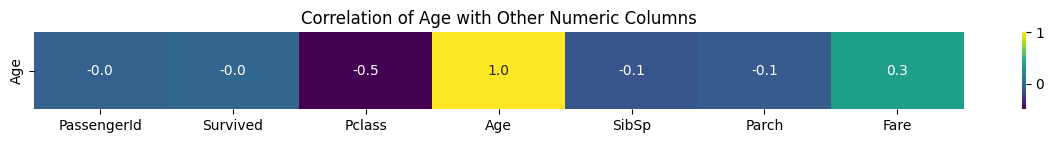

In [35]:
col = df.select_dtypes(include=['number']).columns
correlation_matrix = df[col].corr()


plt.figure(figsize=(15, 1))
sns.heatmap(correlation_matrix["Age"].to_frame().T, annot=True, cmap="viridis", fmt=".1f")
plt.title("Correlation of Age with Other Numeric Columns")
plt.show()

In [37]:
# find the mode of age column
print(df["Age"].mode())


0    21.0
1    24.0
Name: Age, dtype: float64


In [ ]:
if st.checkbox("Confirm the Imputation"):
            df=dummy
            st.session_state.df = df
            st.write(pd.DataFrame((df.isnull().mean() * 100).round(2).astype(str) + '%', columns=['Null values']).T)